In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\14. Decision Tree\Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# renaming the column names
df = data.rename(columns = {"Marital.Status" : "Marital Status","Taxable.Income":"Taxable Income",\
                          "City.Population":"City Population","Work.Experience":"Work Experience"})
df

,Undergrad,Marital Status,Taxable Income,City Population,Work Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
# Converting the "Taxable Income" column from continuous to categorical
d= []
for i in range(0,600):
    if df.iloc[i,2] <= 30000:
        d.append('Risky')
    else:
        d.append('Good')
        
df.iloc[:,2] = d
df

,Undergrad,Marital Status,Taxable Income,City Population,Work Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [5]:
# Label Encoding of the column "Taxable Income"
label_encoder = preprocessing.LabelEncoder()
df['Taxable Income']= label_encoder.fit_transform(df['Taxable Income'])
df.head()

,Undergrad,Marital Status,Taxable Income,City Population,Work Experience,Urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES
2,NO,Married,0,160205,30,YES
3,YES,Single,0,193264,15,YES
4,NO,Married,0,27533,28,NO


In [6]:
# forming the dataframe of the features
X = df.iloc[:,0:2].join(df.iloc[:,3:])
x = pd.get_dummies(X)
x

,City Population,Work Experience,Undergrad_NO,Undergrad_YES,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [7]:
# forming the dataframe for target
y = df.iloc[:,2]

In [8]:
# spliting the data into training and test datasets
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.15,random_state=10)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [9]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

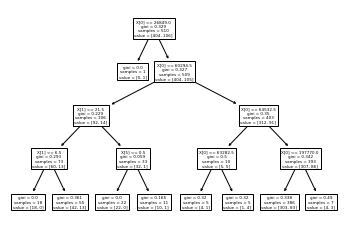

In [10]:
# Ploting the decision tree
tree.plot_tree(model_gini);

In [11]:
pred=model_gini.predict(x_test)
pd.crosstab(y_test,pred)

col_0,0,1
Taxable Income,,
0,70,2
1,18,0


In [12]:
np.mean(pred==y_test)

0.7777777777777778